# Problem Set 3 - Arath Reyes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, uniform

## P6

(c) Set the true $\theta$ to 1. Repeat the following steps for n = 20, 100, 1000:

i. Use a random number generator to draw 10,000 samples of length n from $U(0, \theta)$ and compute the MLE and MM estimators of $\theta$ for each of the 10,000 samples.

ii. Plot the histograms of the 10,000 MLE and MM estimators, respectively.

iii. Compute the mean, bias and standard error of the MLE and MM estimators in the simulated data.

In [11]:
sample = pd.DataFrame()
for m in range(1_000):
    sample[f'U({m+1})'] = uniform.rvs(0,1, size = 10_000)

/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_69014/3227058905.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[f'U({m+1})'] = uniform.rvs(0,1, size = 10_000)
/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_69014/3227058905.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample[f'U({m+1})'] = uniform.rvs(0,1, size = 10_000)
/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_69014/3227058905.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [47]:
mm = 2*sample.mean()
mle = sample.max()
mm_1000, mm_100, mm_20 = mm, mm.iloc[:100], mm.iloc[:20]
mle_1000, mle_100, mle_20 = mle, mle.iloc[:100], mle.iloc[:20]

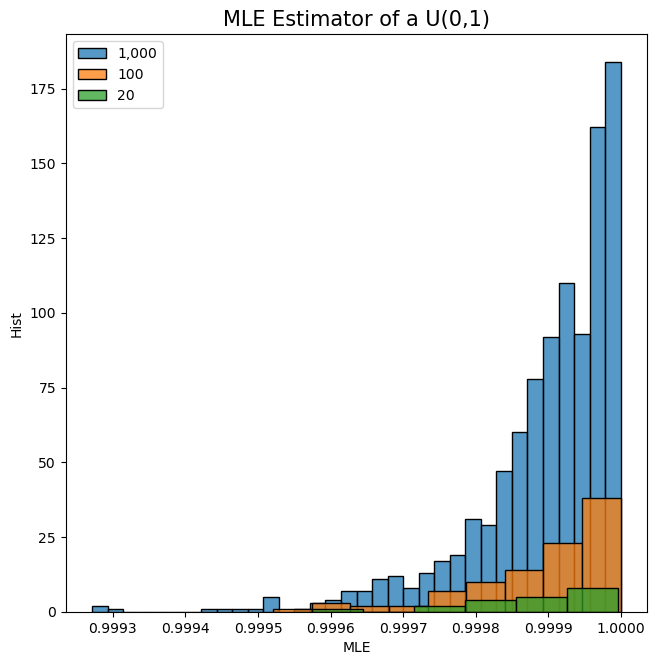

In [165]:
plt.figure(figsize=(7.5,7.5))
ax = sns.histplot(mle_1000, label = '1,000')
sns.histplot(mle_100, label = '100', ax = ax)
sns.histplot(mle_20, label = '20', ax = ax)
ax.set_title(f'MLE Estimator of a U(0,1)',fontsize = 15)
ax.set_xlabel('MLE',fontsize = '10')
ax.set_ylabel('Hist',fontsize = '10')
plt.legend()

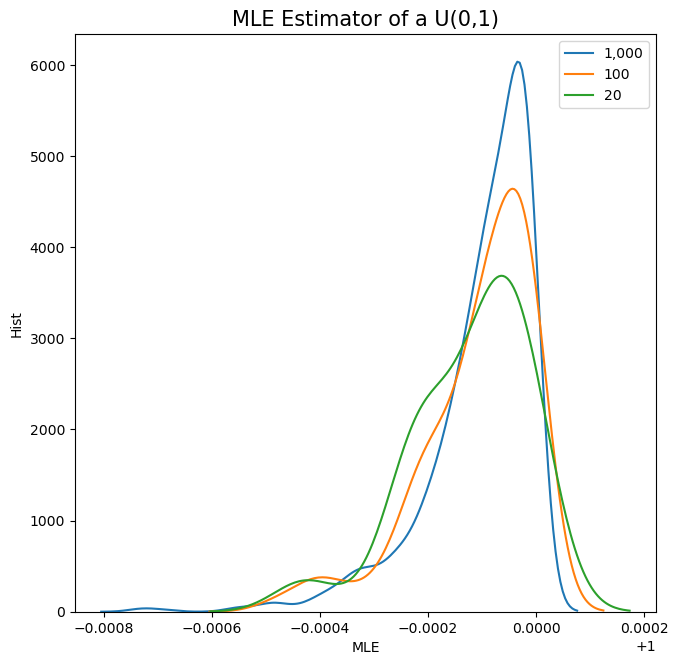

In [167]:
plt.figure(figsize=(7.5,7.5))
ax = sns.kdeplot(mle_1000, label = '1,000')
sns.kdeplot(mle_100, label = '100', ax = ax)
sns.kdeplot(mle_20, label = '20', ax = ax)
ax.set_title(f'MLE Estimator of a U(0,1)',fontsize = 15)
ax.set_xlabel('MLE',fontsize = '10')
ax.set_ylabel('Hist',fontsize = '10')
plt.legend()

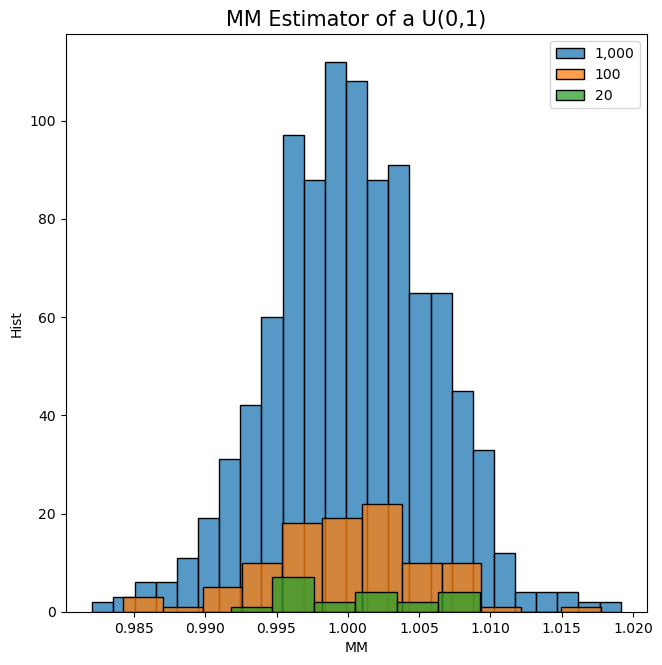

In [171]:
plt.figure(figsize=(7.5,7.5))
ax = sns.histplot(mm_1000, label = '1,000')
sns.histplot(mm_100, label = '100', ax = ax)
sns.histplot(mm_20, label = '20', ax = ax)
ax.set_title(f'MM Estimator of a U(0,1)',fontsize = 15)
ax.set_xlabel('MM',fontsize = '10')
ax.set_ylabel('Hist',fontsize = '10')
plt.legend()

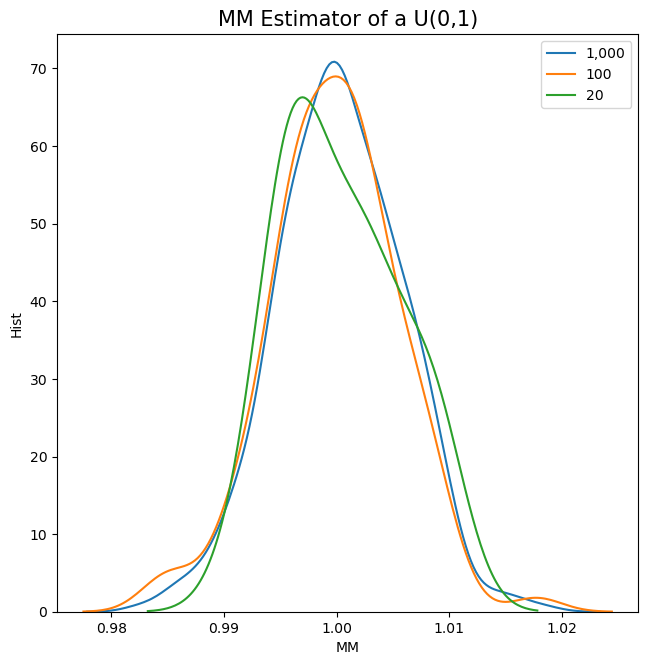

In [169]:
plt.figure(figsize=(7.5,7.5))
ax = sns.kdeplot(mm_1000, label = '1,000')
sns.kdeplot(mm_100, label = '100', ax = ax)
sns.kdeplot(mm_20, label = '20', ax = ax)
ax.set_title(f'MM Estimator of a U(0,1)',fontsize = 15)
ax.set_xlabel('MM',fontsize = '10')
ax.set_ylabel('Hist',fontsize = '10')
plt.legend()

In [187]:
mm_stats = pd.DataFrame(columns = ['Mean', 'Bias', 'Standard Error'], index = [20, 100, 1_000])
for data, n in zip([mm_20, mm_100, mm_1000], [20, 100, 1_000]):
    mm_stats['Mean'][n] = data.mean()
    mm_stats['Bias'][n] = data.mean() - 1
    mm_stats['Standard Error'][n] = data.std()

/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_69014/3247823365.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mm_stats['Mean'][n] = data.mean()
/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_69014/3247823365.py:

In [189]:
mm_stats

,Mean,Bias,Standard Error
20,1.000329,0.000329,0.005205
100,0.999758,-0.000242,0.005616
1000,1.00026,0.00026,0.005618


In [191]:
mle_stats = pd.DataFrame(columns = ['Mean', 'Bias', 'Standard Error'], index = [20, 100, 1_000])
for data, n in zip([mle_20, mle_100, mle_1000], [20, 100, 1_000]):
    mle_stats['Mean'][n] = data.mean()
    mle_stats['Bias'][n] = data.mean() - 1
    mle_stats['Standard Error'][n] = data.std()

/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_69014/998717898.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mle_stats['Mean'][n] = data.mean()
/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_69014/998717898.py:4

In [193]:
mle_stats

,Mean,Bias,Standard Error
20,0.999877,-0.000123,0.000107
100,0.999891,-0.000109,0.000105
1000,0.999898,-0.000102,0.000101
